In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix

In [3]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)
heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0


In [4]:
X = heart.drop(['num'],axis=1).copy()
Y = heart.num.copy()

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.33, stratify=Y)

In [6]:
rfc = RandomForestClassifier()

In [7]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
rfc.set_params( n_estimators = 500)
%time rfc.fit(X_train, Y_train)
r2_train = np.round(rfc.score(X_train, Y_train),3)
r2_test  = np.round(rfc.score(X_test, Y_test),3)
print('Train score is :' + str(r2_train))
print('Test score is :' + str(r2_test))

CPU times: total: 578 ms
Wall time: 600 ms
Train score is :1.0
Test score is :0.634


In [9]:
criterion      = ['gini','entropy']
max_depth      = np.arange(1,20, 5)
max_features   = list(np.arange(1,14,2))
min_samples_split = np.arange(2,20,5)

n_estimators  = 500
n_jobs = -1
random_state = 144

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
rfc_grid = RandomForestClassifier()
rfc_grid.set_params(random_state = 144, n_estimators  = 500)

param_grid = {'criterion':criterion, 'max_depth':max_depth, 'max_features':max_features,
              'min_samples_split':min_samples_split}

rfc_grid = GridSearchCV(rfc_grid, param_grid, cv = 3, return_train_score=True)

%time rfc_grid.fit(X_train, Y_train)

CPU times: total: 7min 22s
Wall time: 7min 23s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=500,
                                              random_state=144),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  6, 11, 16]),
                         'max_features': [1, 3, 5, 7, 9, 11, 13],
                         'min_samples_split': array([ 2,  7, 12, 17])},
             return_train_score=True)

In [12]:
rfc_df = pd.DataFrame(rfc_grid.cv_results_)
rfc_df.shape

(224, 20)

In [13]:
rfc_df.dropna(axis=0,how='any',inplace=True)

In [14]:
rfc_df.shape

(224, 20)

In [15]:
rfc_final_df = rfc_df.loc[:,['param_criterion','param_max_depth','param_max_features',
                            'param_min_samples_split','mean_train_score','mean_test_score']]

In [16]:
rfc_final_df.to_csv('rfc_final.csv')

In [17]:
rfc_final_df.loc[:,['mean_train_score','mean_test_score']].max()

mean_train_score    1.000000
mean_test_score     0.670173
dtype: float64

In [18]:
rfc_final_df['diff'] = abs(rfc_final_df.mean_train_score - rfc_final_df.mean_test_score)

In [26]:
rfc_final_df.sort_values(by='diff',ascending=False).iloc[120:,:]

,param_criterion,param_max_depth,param_max_features,param_min_samples_split,mean_train_score,mean_test_score,diff
103,gini,16,9,17,0.790452,0.643207,0.147245
75,gini,11,9,17,0.789413,0.645277,0.144136
58,gini,11,1,12,0.789436,0.647360,0.142076
86,gini,16,1,12,0.786321,0.645277,0.141044
211,entropy,16,7,17,0.782160,0.643207,0.138954
...,...,...,...,...,...,...,...
138,entropy,1,13,12,0.607896,0.607932,0.000036
27,gini,1,13,17,0.607896,0.607932,0.000036
136,entropy,1,13,2,0.607896,0.607932,0.000036
137,entropy,1,13,7,0.607896,0.607932,0.000036


In [20]:
print('Training score is :' + str(np.round(rfc_grid.best_estimator_.score(X_train, Y_train),2)))
print('Testing  score is :' + str(np.round(rfc_grid.best_estimator_.score(X_test, Y_test),2)))

Training score is :0.73
Testing  score is :0.64


In [27]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [52]:
rfc = RandomForestClassifier()
rfc.set_params(criterion='gini', max_depth = 3, max_features = 12, min_samples_split = 15, random_state = 144)
%time rfc.fit(X_train, Y_train)

r2_train = np.round(rfc.score(X_train, Y_train),3)
r2_test  = np.round(rfc.score(X_test, Y_test),3)
print('Train score is :' + str(r2_train))
print('Test score is :' + str(r2_test))

print(cross_val_score(rfc, X_train, Y_train, cv = 3))
print(cross_val_score(rfc, X_test, Y_test, cv = 3))

CPU times: total: 125 ms
Wall time: 124 ms
Train score is :0.68
Test score is :0.605
[0.64596273 0.63354037 0.675     ]
[0.6625     0.63291139 0.58227848]


In [53]:
conf_data_train = confusion_matrix(Y_train,rfc.predict(X_train))
conf_data_test  = confusion_matrix(Y_test,rfc.predict(X_test))

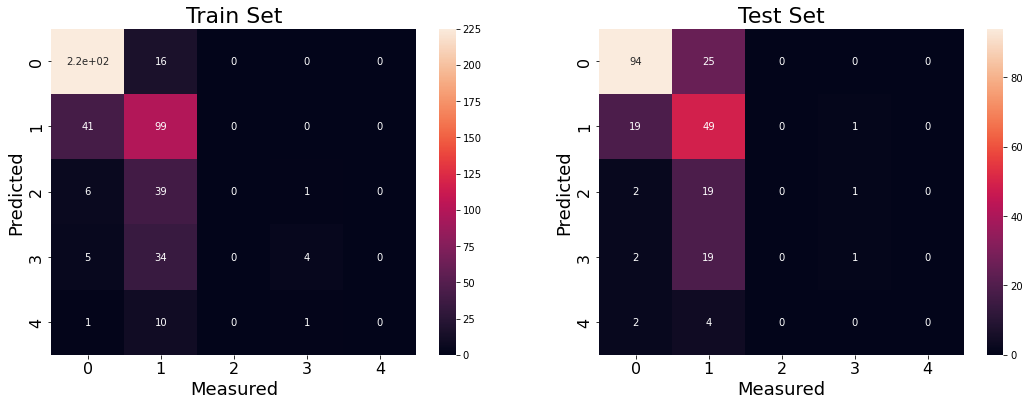

In [54]:
fig, ax = plt.subplots(1,2,figsize= (18,6))
sns.heatmap(conf_data_train, ax = ax[0], annot=True)
sns.heatmap(conf_data_test,  ax = ax[1], annot=True)

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Measured', fontsize= 18)
ax[0].set_ylabel('Predicted', fontsize= 18)
ax[0].set_title('Train Set',fontsize= 22)

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Measured', fontsize= 18)
ax[1].set_ylabel('Predicted', fontsize= 18)
ax[1].set_title('Test Set',fontsize= 22);

In [55]:
conf_train_norm = np.zeros_like(conf_data_train, dtype=float)
conf_test_norm = np.zeros_like(conf_data_test, dtype=float)

sum_vec_train = np.sum(conf_data_train, axis = 1)
sum_vec_test  = np.sum(conf_data_test , axis = 1)

print('*'*100)

for irow in range(conf_train_norm.shape[0]):
    
    conf_train_norm[irow,:] = 100 * np.round(conf_data_train[irow,:]/sum_vec_train[irow],2)
    conf_test_norm[irow,:]  = 100 * np.round(conf_data_test[irow,:]/sum_vec_test[irow],2)

****************************************************************************************************


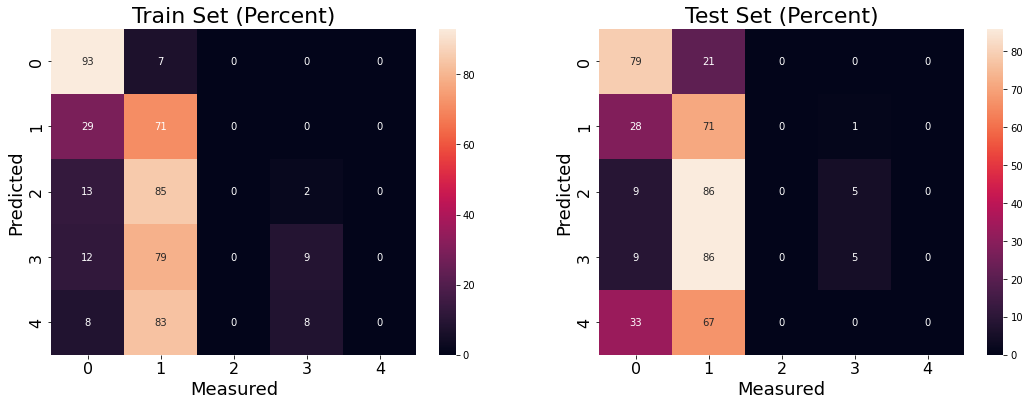

In [56]:
fig, ax = plt.subplots(1,2,figsize= (18,6))
sns.heatmap(conf_train_norm, ax = ax[0], annot=True)
sns.heatmap(conf_test_norm,  ax = ax[1], annot=True)

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Measured', fontsize= 18)
ax[0].set_ylabel('Predicted', fontsize= 18)
ax[0].set_title('Train Set (Percent)',fontsize= 22)

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Measured', fontsize= 18)
ax[1].set_ylabel('Predicted', fontsize= 18)
ax[1].set_title('Test Set (Percent)',fontsize= 22);